# Bar chart of #chicagofire tagged tweets

This example shows how to use the twitter_fire_scraper package to collect 300 tweets with keywords like "chicagofire", "fire", "chicago", etc. and looking at how many of those tweets are talking about the Chicago Fire TV show VS how many are not.

In [1]:
# This is to force using installed packages for testing purposes.
from __future__ import absolute_import

import os

from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

import twitter_fire_scraper

from tweepy import Status

In [2]:
# Get a Twitter developer account and get an API key!

from twitter_fire_scraper.scraper import Scraper
from twitter_fire_scraper.twitter import TwitterAuthentication

twauth = TwitterAuthentication(
    consumer_key="FILL ME IN!",
    consumer_secret="FILL ME IN!",
    access_token="FILL ME IN!",
    access_token_secret="FILL ME IN!",
)

print("You can fill these in yourself and avoid having to use `secrets.json` inside of your home folder.")

if twauth.consumer_key == "FILL ME IN!":
    # If they have not set up the twauth variable,
    
    if not os.path.exists(os.path.expanduser("~/secrets.json")):
        # If autodetect of twitter API keys will surely fail,
        
        print(
            "This demo will not work without either a valid TwitterAuthentication object or a file that has your secrets in it.")
        print(
            "Either make a file at `{}` containing your keys, or put them directly into the TwitterAuthentication object.".format(
                os.path.expanduser("~\\secrets.json")))
        print("Read the README about this to know more.")
        print("Aborting!")
        %pycat
        exit(1)
    else:
        # Autodetectof twitter API keys should work.
        twauth = TwitterAuthentication.autodetect_twitter_auth()


You can fill these in yourself and avoid having to use `secrets.json` inside of your home folder.


# Gathering data

Here, we scrape the top 300 terms about the following subjects to see how much people use the #chicagofire hashtags and terms to talk about the new TV show by the same name.

In [3]:
search_terms = {"chicagofire", "#chicagofire", "chicago fire", "fire", "chicago"}

In [4]:
scraper = Scraper(twitter_authentication=twauth)

# Only gets results if it doesn't exist. This is to limit how much we ping the API.
# This can be thwarted by taking line 8 out of a try-catch, or restarting the Python kernel.
try:
    results
except NameError as e:
    results = scraper.scrape_terms(search_terms, count=300)

for category, statuses in results.items():
    print("{:15s}: {} hits".format(category, len(statuses)))

Rate limit reached. Sleeping for: 77


chicago        : 300 hits
chicagofire    : 300 hits
#chicagofire   : 300 hits
chicago fire   : 300 hits
fire           : 300 hits


# Naive classification of tweets'

This section will define a function that tells if a tweet is actually talking about the Chicago Fire TV show in a very naive manner.

If a tweet has "NBC", "Netflix", "TV", "show", "series", etc. inside of it, it will be classified as a tweet that IS talking about the Chicago Fire TV show.

In [5]:
# Yeah, don't worry about this. To add terms, just put more strings in the 'red text' area.
tv_terms = \
[term for term in ("""
nbc
netflix
hbo

tv
series
show
season
""")\
.split("\n") if term != '']

def is_a_tv_tweet(status: Status) -> bool:
    """A naive way of telling if a tweet or user from a Status is related in any way to the "Chicago Fire" TV show."""
    for tv_term in tv_terms:
        
        tv_term = tv_term.lower()
        
        if tv_term in status.text.lower():
            return True
        
        if tv_term in status.author.name.lower():
            return True
        
        if tv_term in status.author.screen_name.lower():
            return True
        
    return False

# Explanation of naive TV tweet classifier

A tweet can be said to be a "TV tweet" if it contains any of the following words in its text, author's screen name, or author's username:

In [6]:
print(tv_terms)

['nbc', 'netflix', 'hbo', 'tv', 'series', 'show', 'season']


In [7]:
tv_tweets = {}
not_tv_tweets = {}

for category, statuses in results.items():

    if category not in tv_tweets:
        tv_tweets[category] = 0

    if category not in not_tv_tweets:
        not_tv_tweets[category] = 0
        
    for status in statuses:
        if is_a_tv_tweet(status):
            tv_tweets[category] += 1
        else:
            not_tv_tweets[category] += 1

print("Categorical breakdown of tweets that ARE about the Chicago Fire TV show:")
for key, value in tv_tweets.items():
    print("{:15s}: {} hits".format(key, value))

print()
    
print("Categorical breakdown of tweets that ARE NOT about the Chicago Fire TV show:")
for key, value in not_tv_tweets.items():
    print("{:15s}: {} hits".format(key, value))


Categorical breakdown of tweets that ARE about the Chicago Fire TV show:
chicago        : 27 hits
chicagofire    : 84 hits
#chicagofire   : 139 hits
chicago fire   : 41 hits
fire           : 86 hits

Categorical breakdown of tweets that ARE NOT about the Chicago Fire TV show:
chicago        : 273 hits
chicagofire    : 216 hits
#chicagofire   : 161 hits
chicago fire   : 259 hits
fire           : 214 hits


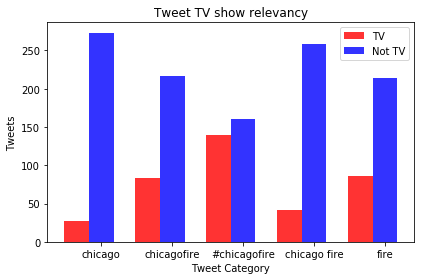

In [9]:
n_groups = len(results.keys())
tv_tweet_hits = tv_tweets.values()
not_tv_tweet_hits = not_tv_tweets.values()
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, tv_tweet_hits, bar_width,
alpha=opacity,
color='r',
label='TV')
 
rects2 = plt.bar(index + bar_width, not_tv_tweet_hits, bar_width,
alpha=opacity,
color='b',
label='Not TV')
 
plt.xlabel('Tweet Category')
plt.ylabel('Tweets')
plt.title('Tweet TV show relevancy')
plt.xticks(index + bar_width, results.keys())
plt.legend()
 
plt.tight_layout()
plt.show()
